# San Francisco Bay Bike-sharing System Visualization
## by Mahmoud Fawzy


## Investigation Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.  the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay, and San Jose. In this investigation, we will discover some facts and patterns within the data provided to understand the users and their behaviors.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. You can find the raw data [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the csv file, and check its top 10 rows
Bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# adding all new columns

Bike_df['age'] = 2019 - Bike_df['member_birth_year'] 

Bike_df['start_hour'] = Bike_df['start_time'].str[11:13]

Bike_df['duration_min'] = Bike_df['duration_sec']/60


Bike_df['start_time'] = pd.to_datetime(Bike_df['start_time'])
Bike_df['end_time'] = pd.to_datetime(Bike_df['end_time'])

Bike_df['start_day_week'] = Bike_df['start_time'].dt.strftime('%A')
Bike_df['end_day_week'] = Bike_df['end_time'].dt.strftime('%A')


## Simple look on Users Categories 

> We can divide The users using 2 different parameters: Gender and Type
> 
> Gender: into Male, Female, and Other. seems that male users are more than the female ones
>
> Type: Subscriber and Customer. Subscribers are more, and of course, this is their main way of transportation within the bay area

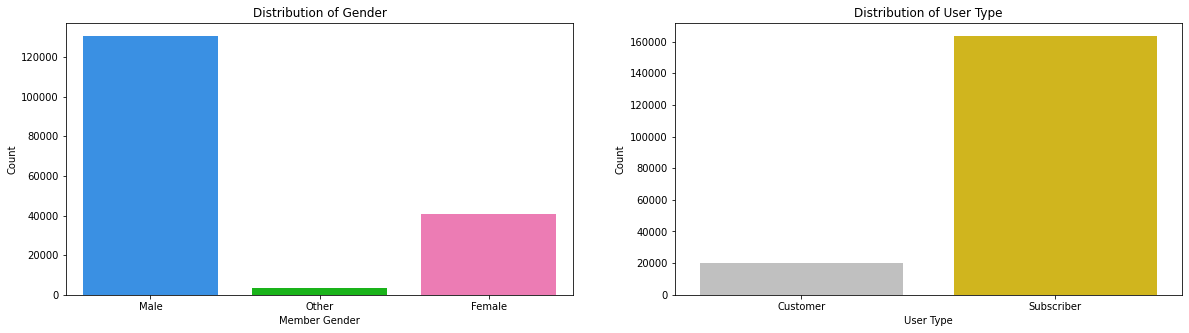

In [3]:
# Figure size
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1)

# Main Plot
sb.countplot(data=Bike_df, x='member_gender', palette =['#1E90FF','#00CD00','#FF69B4']);
plt.title('Distribution of Gender')

# Labeling the axes
plt.xlabel('Member Gender')
plt.ylabel('Count');


plt.subplot(1, 2, 2)

# Main Plot
sb.countplot(data=Bike_df, x='user_type' , palette =['#C0C0C0','#EEC900']);
plt.title('Distribution of User Type')

# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Count');

## The relation between User Type and Days

> In the US, weekend off days are saturaday and sunday.

> Here we see that the decrease in weekend days happens for the subscribers only (because they use bikes to go to their jobs) 
>
> while customers count of trips didn't change throughout the weekdays 

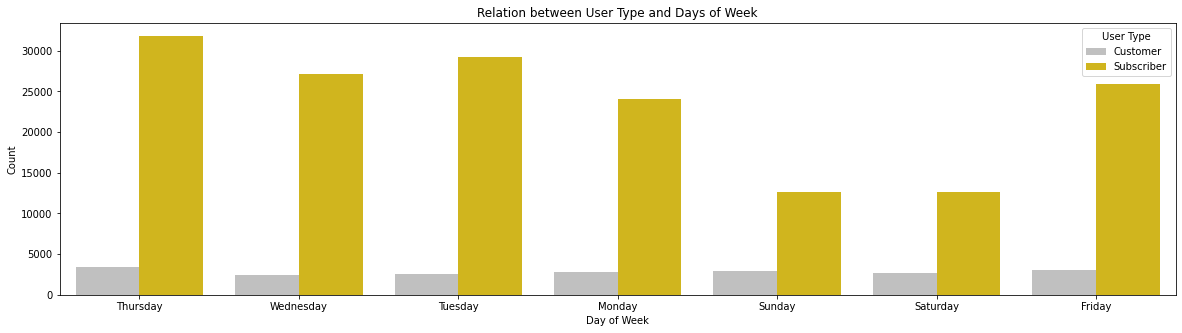

In [4]:
plt.figure(figsize = [20, 5])

# Main Plot
sb.countplot(data = Bike_df, hue = 'user_type', x = 'start_day_week' , palette =['#C0C0C0','#EEC900']);
plt.title('Relation between User Type and Days of Week')

# Legend Title
plt.legend(title='User Type')

# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Count');

## The relation between Gender and Days

> In the US, weekend off days are saturaday and sunday.

> Seems that the decrese in trip counts for men is much bigger than the decrese for women. 
>
> this could mean that the workers in the bay area are men more than women 

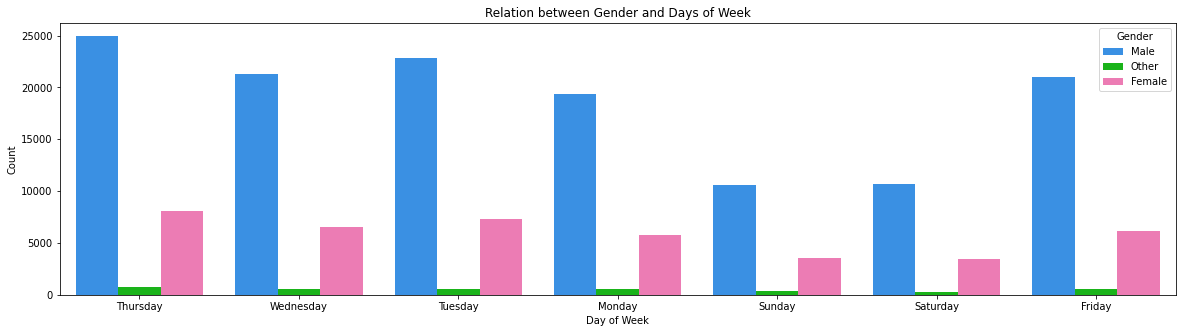

In [5]:
plt.figure(figsize = [20, 5])

# Main Plot
sb.countplot(data = Bike_df, hue = 'member_gender', x = 'start_day_week' , palette =['#1E90FF','#00CD00','#FF69B4']);
plt.title('Relation between Gender and Days of Week')

# Legend Title
plt.legend(title='Gender')

# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Count');

## The relation between Hour,  Day of Week and User Type

> Here we can see a full Idea about the difference between each user type and how they behave 

> Subscribers:
>
> in workdays: they go to work at 08:00 and back from work at 17:00
>
> on weekends: they mostly don't use the bikes these days at all

> Customers: 
>
> in workdays: similar to the subscribers but a lower density because bikes are not their main way of transportation (if so, they will subscribe)
>
> on weekends: they use the bikes in the afternoon in a significant density  

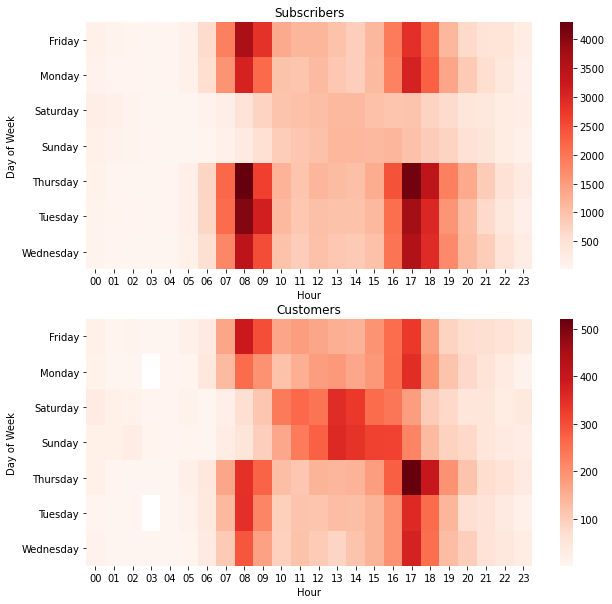

In [6]:
plt.figure(figsize = [10, 10])

# Subscribers
plt.subplot(2,1,1)
Bike_df_subs = Bike_df[Bike_df['user_type'] == 'Subscriber']
ct_counts_subs = Bike_df_subs.groupby(['start_day_week', 'start_hour']).size()
ct_counts_subs = ct_counts_subs.reset_index(name = 'count')
ct_counts_subs = ct_counts_subs.pivot(index = 'start_day_week', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts_subs , cmap = "Reds" , label = 'Trip Count')

plt.title('Subscribers')

# Labeling the axes
plt.xlabel('Hour')
plt.ylabel('Day of Week');



# Customers
plt.subplot(2,1,2)
Bike_df_custs = Bike_df[Bike_df['user_type'] == 'Customer']
ct_counts_custs = Bike_df_custs.groupby(['start_day_week', 'start_hour']).size()
ct_counts_custs = ct_counts_custs.reset_index(name = 'count')
ct_counts_custs = ct_counts_custs.pivot(index = 'start_day_week', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts_custs , cmap = "Reds")

plt.title('Customers')

# Labeling the axes
plt.xlabel('Hour')
plt.ylabel('Day of Week');



In [ ]:
#! jupyter nbconvert slide_deck_MFT.ipynb --to slides --post serve --no-input

! jupyter nbconvert slide_deck_MFT.ipynb --to slides --post serve --no-input